In [1]:
import pandas as pd

combined_df = pd.read_csv(r"C:\Users\pc\OneDrive\Desktop\movie-Box-hit-predictor\data_cleaned\combined_all_data.csv")

📊 Dataset shape: (52191, 35)

📋 Missing values per column (Top 10):
Unnamed: 0             0
title                  0
budget                 0
revenue                0
popularity             0
vote_average           0
vote_count             0
director_encoded       0
top_cast_avg_rating    0
release_year           0
dtype: int64

📈 Numeric Summary:
                             mean           std          min           max
Unnamed: 0           2.609500e+04  1.506639e+04     0.000000  5.219000e+04
budget               7.354294e+06  2.395553e+07     0.000000  5.839000e+08
revenue              2.008130e+07  9.006889e+07     0.000000  2.799439e+09
popularity           4.294494e+00  1.039356e+01     0.000000  8.755813e+02
vote_average         5.703768e+00  1.844041e+00     0.000000  1.000000e+01
vote_count           2.597563e+02  1.105656e+03     0.000000  3.202700e+04
director_encoded     2.218618e+03  6.670122e+02     0.000000  2.528000e+03
top_cast_avg_rating  5.281293e+00  1.781388e+00  

c:\Users\pc\OneDrive\Desktop\movie-Box-hit-predictor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


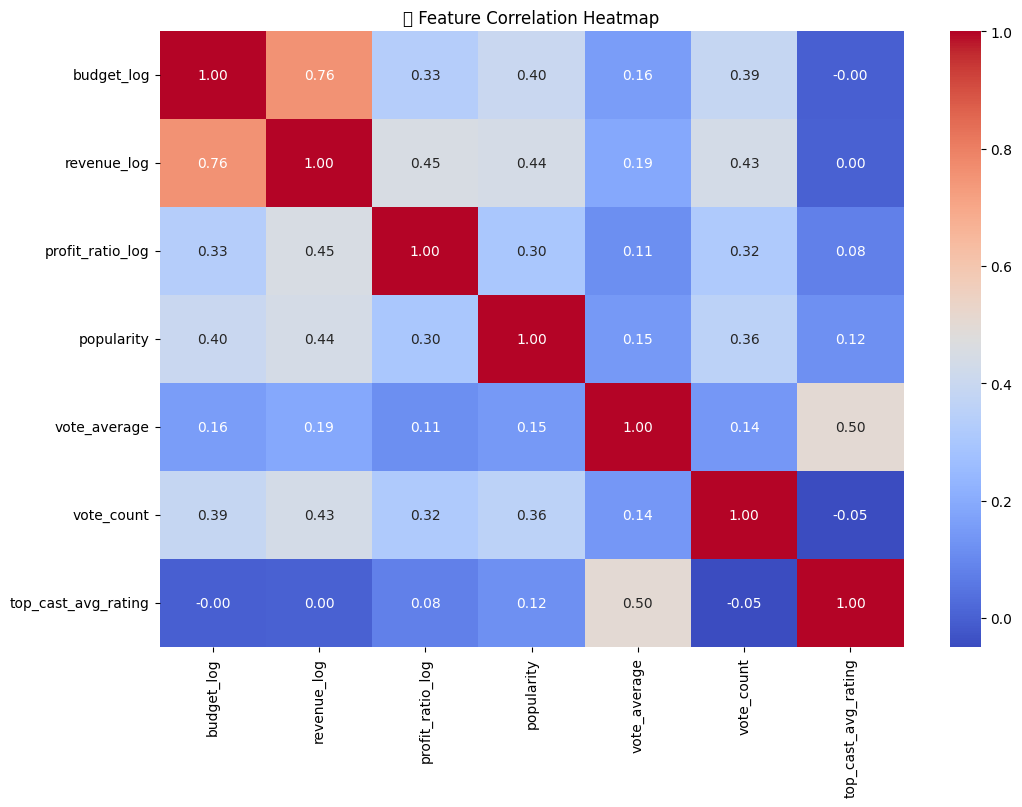

C:\Users\pc\AppData\Local\Temp\ipykernel_13952\3177246655.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\pc\OneDrive\Desktop\movie-Box-hit-predictor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


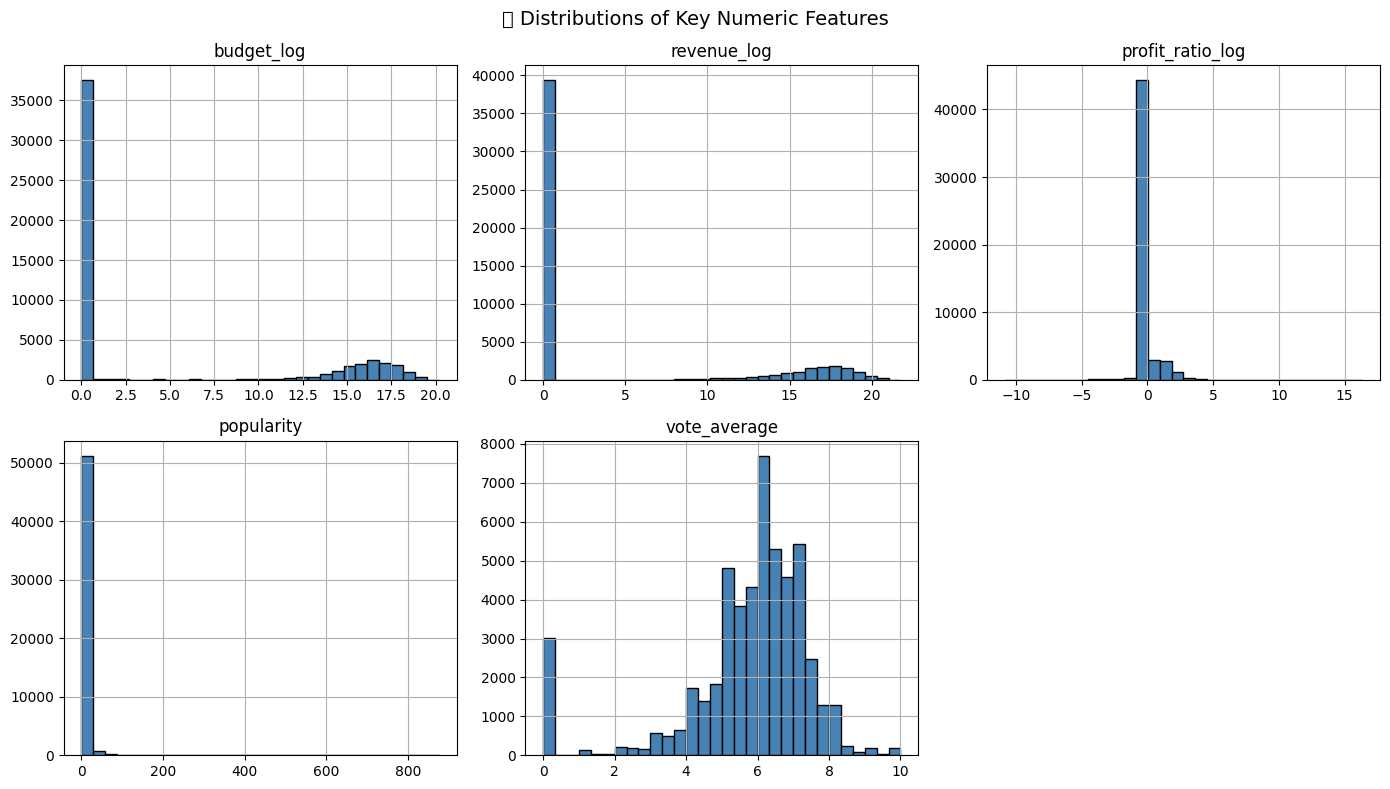

c:\Users\pc\OneDrive\Desktop\movie-Box-hit-predictor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


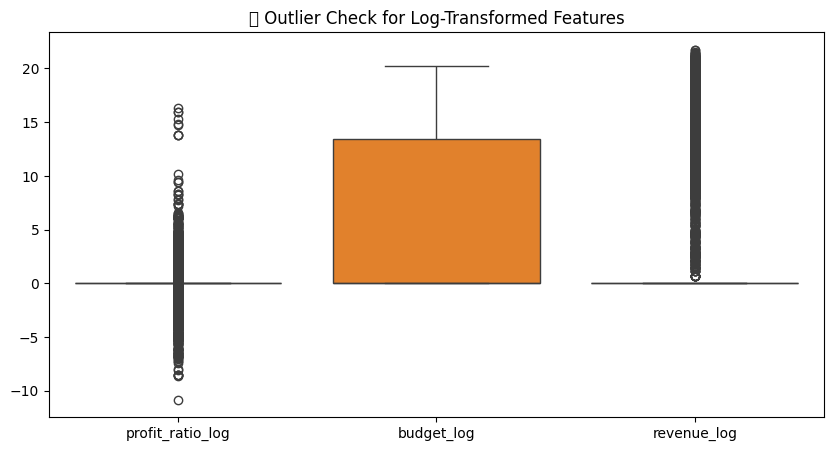

C:\Users\pc\AppData\Local\Temp\ipykernel_13952\3177246655.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
c:\Users\pc\OneDrive\Desktop\movie-Box-hit-predictor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


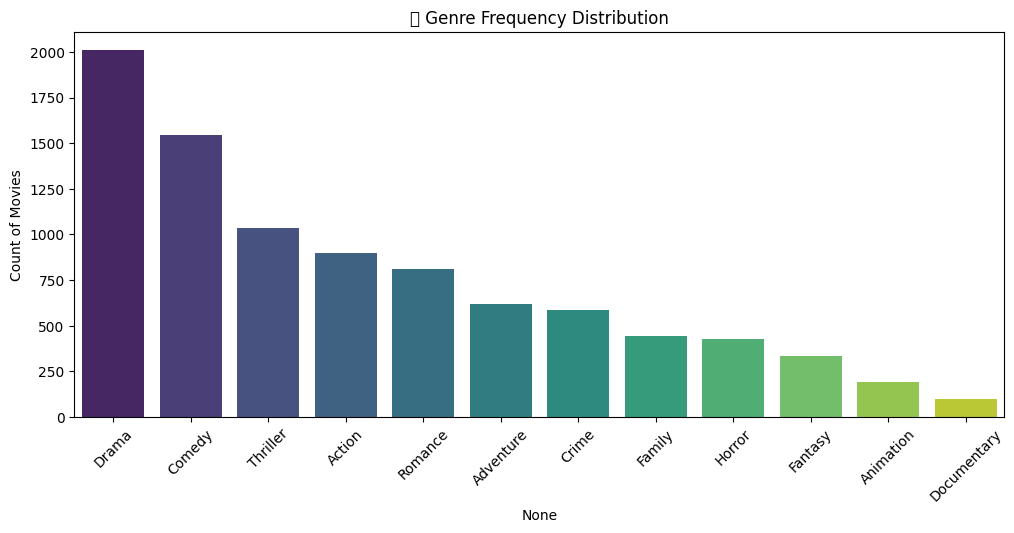

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ✅ 1️⃣ Basic Overview
print("📊 Dataset shape:", combined_df.shape)
print("\n📋 Missing values per column (Top 10):")
print(combined_df.isna().sum().sort_values(ascending=False).head(10))
print("\n📈 Numeric Summary:")
print(combined_df.describe().T[['mean', 'std', 'min', 'max']])

# ✅ 2️⃣ Correlation Heatmap (Top Features)
plt.figure(figsize=(12, 8))
corr = combined_df[['budget_log', 'revenue_log', 'profit_ratio_log', 'popularity', 
                    'vote_average', 'vote_count', 'top_cast_avg_rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("🔗 Feature Correlation Heatmap")
plt.show()

# ✅ 3️⃣ Distribution Plots
numeric_cols = ['budget_log', 'revenue_log', 'profit_ratio_log', 'popularity', 'vote_average']
combined_df[numeric_cols].hist(bins=30, figsize=(14, 8), layout=(2,3), color='steelblue', edgecolor='black')
plt.suptitle("📊 Distributions of Key Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

# ✅ 4️⃣ Outlier Detection Check
plt.figure(figsize=(10,5))
sns.boxplot(data=combined_df[['profit_ratio_log', 'budget_log', 'revenue_log']])
plt.title("📦 Outlier Check for Log-Transformed Features")
plt.show()

# ✅ 5️⃣ Genre Popularity
genre_cols = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 
              'Drama', 'Family', 'Fantasy', 'Horror', 'Romance', 'Thriller']
genre_counts = combined_df[genre_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("🎬 Genre Frequency Distribution")
plt.ylabel("Count of Movies")
plt.show()


In [3]:
# ✅ 1️⃣ Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ✅ 2️⃣ Define your dataset
df = combined_df.copy()  # replace merged_df with your DataFrame variable if named differently

# ✅ 3️⃣ Define target and feature columns
target = 'profit_ratio_log'

# Drop columns not useful for modeling
drop_cols = ['title', 'Unnamed: 0', 'profit_ratio']  # raw profit_ratio removed
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

# ✅ 4️⃣ Handle missing values (safe filling)
df = df.fillna(0)

# ✅ 5️⃣ Define numeric and categorical (genre) features
numeric_features = [
    'budget_log', 'revenue_log', 'popularity', 'vote_average',
    'vote_count', 'top_cast_avg_rating', 'release_year', 'release_month'
]

genre_features = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 
    'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 
    'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
    'Thriller', 'War', 'Western'
]

# Optional: director_encoded can be useful if you encoded it numerically
if 'director_encoded' in df.columns:
    numeric_features.append('director_encoded')

# ✅ 6️⃣ Final feature set
X = df[numeric_features + genre_features]
y = df[target]

# ✅ 7️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 8️⃣ Scale numeric features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# ✅ 9️⃣ Check result
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print("✅ Preprocessing complete. Ready for modeling.")


Train shape: (41752, 29), Test shape: (10439, 29)
✅ Preprocessing complete. Ready for modeling.


📊 Random Forest Model Evaluation:
R² Score: 0.9483
MAE: 0.0107
RMSE: 0.1588


C:\Users\pc\AppData\Local\Temp\ipykernel_13952\1484484010.py:44: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\pc\OneDrive\Desktop\movie-Box-hit-predictor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


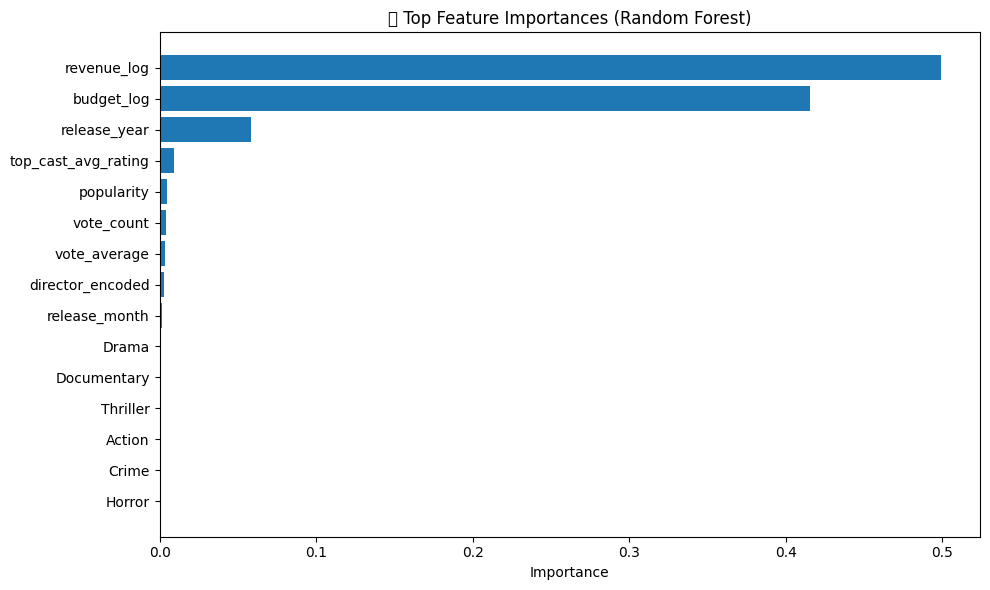

In [4]:
# ✅ 1️⃣ Imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ✅ 2️⃣ Initialize model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

# ✅ 3️⃣ Train model
rf_model.fit(X_train, y_train)

# ✅ 4️⃣ Predict on test set
y_pred = rf_model.predict(X_test)

# ✅ 5️⃣ Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Random Forest Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# ✅ 6️⃣ Feature Importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort and plot
indices = np.argsort(importances)[::-1]
top_n = 15  # show top 15 features

plt.figure(figsize=(10,6))
plt.title("🎬 Top Feature Importances (Random Forest)")
plt.barh(range(top_n), importances[indices][:top_n][::-1], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]][::-1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [5]:
# --- A. Compare RandomForest with XGBoost & LightGBM ---

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- Train XGBoost ---
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# --- Train LightGBM ---
lgb_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgb_model.fit(X_train, y_train)

# --- Evaluate both models ---
models = {'RandomForest': rf_model, 'XGBoost': xgb_model, 'LightGBM': lgb_model}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'R²': r2, 'MAE': mae, 'RMSE': rmse})

# --- Display results ---
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print("📊 Model Performance Comparison:\n")
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 41752, number of used features: 28
[LightGBM] [Info] Start training from score 0.152690
📊 Model Performance Comparison:

          Model        R²       MAE      RMSE
2      LightGBM  0.961808  0.022135  0.136423
0  RandomForest  0.948275  0.010691  0.158763
1       XGBoost  0.948204  0.018763  0.158872


In [6]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define base model
lgbm = LGBMRegressor(random_state=42)

# Parameter grid for tuning
param_dist = {
    'num_leaves': [31, 50, 70, 100, 150, 200],
    'max_depth': [4, 6, 8, 10, 12, -1],
    'learning_rate': [0.005, 0.01, 0.03, 0.05, 0.1],
    'n_estimators': [300, 500, 800, 1200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.3, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.3, 0.5, 1]
}

# Randomized search (faster than grid search)
search = RandomizedSearchCV(
    lgbm, 
    param_distributions=param_dist,
    n_iter=30,  # number of random combinations to try
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit search on training data
search.fit(X_train, y_train)

# Best model
best_lgbm = search.best_estimator_
print("✅ Best Parameters:", search.best_params_)

# Evaluate tuned model
y_pred = best_lgbm.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n🎯 Tuned LightGBM Results:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 41752, number of used features: 28
[LightGBM] [Info] Start training from score 0.152690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [9]:
import pickle
import json

# Save LightGBM model
with open("lightgbm_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the column names used for training
with open("model_features.json", "w") as f:
    json.dump(list(X_train.columns), f)

print("✅ Model and feature columns saved successfully!")


✅ Model and feature columns saved successfully!


In [10]:
# ===========================================
# 🎬 Load and Test Your Tuned LightGBM Model
# ===========================================

import pickle
import json
import pandas as pd

# 1️⃣ Load the model and feature columns
with open("lightgbm_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("model_features.json", "r") as f:
    feature_cols = json.load(f)

print(f"✅ Model and feature list loaded! ({len(feature_cols)} features)")

# 2️⃣ Create a new movie example (same structure as your training features)
new_movie = pd.DataFrame([{
    "budget": 150_000_000,
    "popularity": 80.0,
    "vote_average": 7.8,
    "vote_count": 1200,
    "director_encoded": 1200,
    "top_cast_avg_rating": 6.8,
    "release_year": 2025,
    "release_month": 7,
    "budget_log": 18.83,
    "revenue_log": 0,          # placeholder, model may not need this
    "profit_ratio": 0,         # placeholder
    "Action": 1,
    "Adventure": 1,
    "Fantasy": 1,
    "Science Fiction": 1,
    "Thriller": 1,
    # fill all other genres with 0 (model expects all)
    "Comedy": 0,
    "Drama": 0,
    "Horror": 0,
    "Romance": 0,
    "Crime": 0,
    "Animation": 0,
    "Documentary": 0,
    "Family": 0,
    "Music": 0,
    "Mystery": 0,
    "War": 0,
    "Western": 0,
    "Foreign": 0,
    "History": 0,
    "TV Movie": 0,
}])

# 3️⃣ Add any missing columns from training (set to 0)
for col in feature_cols:
    if col not in new_movie.columns:
        new_movie[col] = 0

# 4️⃣ Ensure correct column order
new_movie = new_movie[feature_cols]

# 5️⃣ Predict revenue
predicted_revenue = model.predict(new_movie)[0]
print(f"\n💰 Predicted Revenue: ${predicted_revenue:,.2f}")


✅ Model and feature list loaded! (29 features)

💰 Predicted Revenue: $-6.08


In [11]:
import numpy as np
import pickle
import json
import pandas as pd

# 1️⃣ Load model + features
with open("lightgbm_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("model_features.json", "r") as f:
    feature_cols = json.load(f)

# 2️⃣ Define new movie
new_movie = pd.DataFrame([{
    "budget": 150_000_000,
    "popularity": 80.0,
    "vote_average": 7.8,
    "vote_count": 1200,
    "director_encoded": 1200,
    "top_cast_avg_rating": 6.8,
    "release_year": 2025,
    "release_month": 7,
    "budget_log": np.log1p(150_000_000),
    "revenue_log": 0,
    "profit_ratio": 0,
    "Action": 1,
    "Adventure": 1,
    "Fantasy": 1,
    "Science Fiction": 1,
    "Thriller": 1,
    # others as 0
    "Comedy": 0, "Drama": 0, "Horror": 0, "Romance": 0, "Crime": 0,
    "Animation": 0, "Documentary": 0, "Family": 0, "Music": 0, "Mystery": 0,
    "War": 0, "Western": 0, "Foreign": 0, "History": 0, "TV Movie": 0,
}])

# 3️⃣ Align features
for col in feature_cols:
    if col not in new_movie.columns:
        new_movie[col] = 0
new_movie = new_movie[feature_cols]

# 4️⃣ Predict
pred = model.predict(new_movie)[0]

# 5️⃣ Try interpreting as revenue_log
predicted_revenue = np.expm1(pred)
print(f"Raw model output: {pred:.4f}")
print(f"💰 Predicted Revenue (approx): ${predicted_revenue:,.2f}")


Raw model output: -6.0766
💰 Predicted Revenue (approx): $-1.00


In [27]:
import numpy as np
import pickle
import json
import pandas as pd


# 1️⃣ Load model + features
with open("lightgbm_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("model_features.json", "r") as f:
    feature_cols = json.load(f)

# === Superman (2025) example ===
new_movie = pd.DataFrame([{
    "budget": 200_000_000,
    "popularity": 120.0,
    "vote_average": 7.5,
    "vote_count": 5000,
    "director_encoded": 1450,
    "top_cast_avg_rating": 7.2,
    "release_year": 2025,
    "release_month": 7,

    # Genre flags
    "Action": 1, "Adventure": 1, "Animation": 0, "Comedy": 0, "Crime": 0,
    "Documentary": 0, "Drama": 0, "Family": 0, "Fantasy": 1, "Foreign": 0,
    "History": 0, "Horror": 0, "Music": 0, "Mystery": 0, "Romance": 0,
    "Science Fiction": 1, "TV Movie": 0, "Thriller": 1, "War": 0, "Western": 0
}])

# Keep the budget before alignment (so we can still compute revenue later)
movie_budget = new_movie["budget"].iloc[0]

# 3️⃣ Align with feature columns (add missing columns, fill with 0)
for col in feature_cols:
    if col not in new_movie.columns:
        new_movie[col] = 0

# Make sure order matches
new_movie = new_movie[feature_cols]

# 4️⃣ Predict log profit ratio
pred = model.predict(new_movie)[0]

# 5️⃣ Convert to actual profit ratio and revenue
pred_profit_ratio = np.exp(pred)
predicted_revenue = movie_budget * pred_profit_ratio

print(f"Raw model output (log profit ratio): {pred:.4f}")
print(f"Predicted profit ratio: {pred_profit_ratio:.2f}")
print(f"💰 Estimated revenue: ${predicted_revenue:,.2f}")


Raw model output (log profit ratio): 0.4750
Predicted profit ratio: 1.61
💰 Estimated revenue: $321,604,119.26


In [31]:
import numpy as np
import pandas as pd
import joblib
import json
import pickle  # you forgot to import this :)

# 1️⃣ Load model + features
with open("lightgbm_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("model_features.json", "r") as f:
    feature_columns = json.load(f)

def batch_predict_movies(movie_list):
    """
    movie_list: list of dicts
        Each dict = one movie with features and (optional) actual_revenue
    """
    results = []

    for movie in movie_list:
        name = movie.get("title", "Unknown")
        actual_rev = movie.get("actual_revenue", None)
        features = {k: v for k, v in movie.items() if k not in ["title", "actual_revenue"]}

        # Ensure all model features exist
        new_movie = pd.DataFrame([features])
        for col in feature_columns:
            if col not in new_movie.columns:
                new_movie[col] = 0
        new_movie = new_movie[feature_columns]

        # Predict
        pred_log_ratio = model.predict(new_movie)[0]
        pred_ratio = np.exp(pred_log_ratio)
        predicted_rev = features.get("budget", 0) * pred_ratio

        accuracy = None
        if actual_rev and actual_rev > 0:
            diff = abs(predicted_rev - actual_rev)
            accuracy = 100 * (1 - diff / actual_rev)

        results.append({
            "Movie": name,
            "Predicted_Revenue": round(predicted_rev, 2),
            "Actual_Revenue": actual_rev,
            "Accuracy(%)": round(accuracy, 2) if accuracy is not None else None
        })

    df = pd.DataFrame(results)
    df = df.sort_values(by="Accuracy(%)", ascending=False, na_position='last')
    return df.reset_index(drop=True)


# === Example Usage ===
movies_to_test = [
    {
        "title": "Superman (2025)",
        "budget": 200_000_000,
        "popularity": 85.0,
        "vote_average": 7.3,
        "vote_count": 1200,
        "director_encoded": 1024,
        "top_cast_avg_rating": 6.8,
        "release_year": 2025,
        "release_month": 7,
        "budget_log": np.log1p(200_000_000),
        "revenue_log": 0,
        "profit_ratio": 0,
        "Action": 1, "Adventure": 1, "Science Fiction": 1,
        "actual_revenue": 616_000_000
    },
    {
        "title": "Barbie (2023)",
        "budget": 145_000_000,
        "popularity": 90.5,
        "vote_average": 7.9,
        "vote_count": 12000,
        "director_encoded": 888,
        "top_cast_avg_rating": 7.2,
        "release_year": 2023,
        "release_month": 7,
        "budget_log": np.log1p(145_000_000),
        "revenue_log": 0,
        "profit_ratio": 0,
        "Comedy": 1, "Adventure": 1, "Fantasy": 1,
        "actual_revenue": 1440_000_000
    },
    {
        "title": "Oppenheimer (2023)",
        "budget": 100_000_000,
        "popularity": 80.0,
        "vote_average": 8.4,
        "vote_count": 20000,
        "director_encoded": 501,
        "top_cast_avg_rating": 7.8,
        "release_year": 2023,
        "release_month": 7,
        "budget_log": np.log1p(100_000_000),
        "revenue_log": 0,
        "profit_ratio": 0,
        "Drama": 1, "History": 1,
        "actual_revenue": 960_000_000
    }
]

df_results = batch_predict_movies(movies_to_test)
print(df_results)


                Movie  Predicted_Revenue  Actual_Revenue  Accuracy(%)
0     Superman (2025)          456353.42       616000000         0.07
1  Oppenheimer (2023)          253109.67       960000000         0.03
2       Barbie (2023)          329686.65      1440000000         0.02
